In [ ]:
#구글 드라이브 연결
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import pandas as pd
import random
import os
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor

import matplotlib.pyplot as plt

import xgboost as xgb

In [ ]:
#구글 드라이브 경로 설정 
DATA_PATH = '/content/gdrive/My Drive/Colab Notebooks/LG AI/' 
SUBMISSION_PATH = '/content/gdrive/My Drive/Colab Notebooks/LG AI/' 

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(42) # Seed 고정

Data Load

In [ ]:
train_df = pd.read_csv(DATA_PATH + 'train.csv')

In [ ]:
train_x = train_df.filter(regex='X') # Input : X Featrue
train_y = train_df.filter(regex='Y') # Output : Y Feature

In [ ]:
#결측치 확인 -> 결측치 없음
print(train_x.isna().any())
print(train_y.isna().any())

X_01    False
X_02    False
X_03    False
X_04    False
X_05    False
X_06    False
X_07    False
X_08    False
X_09    False
X_10    False
X_11    False
X_12    False
X_13    False
X_14    False
X_15    False
X_16    False
X_17    False
X_18    False
X_19    False
X_20    False
X_21    False
X_22    False
X_23    False
X_24    False
X_25    False
X_26    False
X_27    False
X_28    False
X_29    False
X_30    False
X_31    False
X_32    False
X_33    False
X_34    False
X_35    False
X_36    False
X_37    False
X_38    False
X_39    False
X_40    False
X_41    False
X_42    False
X_43    False
X_44    False
X_45    False
X_46    False
X_47    False
X_48    False
X_49    False
X_50    False
X_51    False
X_52    False
X_53    False
X_54    False
X_55    False
X_56    False
dtype: bool
Y_01    False
Y_02    False
Y_03    False
Y_04    False
Y_05    False
Y_06    False
Y_07    False
Y_08    False
Y_09    False
Y_10    False
Y_11    False
Y_12    False
Y_13    False
Y_14    False
dtype: b

In [ ]:
train_x.describe()

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
count,39607.000000,39607.000000,39607.000000,39607.0,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,...,39607.0,39607.0,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000
mean,68.412040,103.320166,68.826354,1.0,102.337203,70.597211,29.407490,164.449320,225.397470,0.002449,...,1.0,1.0,16676.913639,130.774557,131.457418,138.587595,127.992420,128.014110,137.884711,128.441119
std,2.655983,0.000372,5.151167,0.0,0.548353,2.259820,7.338204,220.402444,66.734725,0.086255,...,0.0,0.0,8584.427420,5.989845,5.934313,6.469813,5.713153,5.433958,6.552101,5.444245
min,56.268000,103.320000,56.470000,1.0,101.774000,61.726000,14.140000,38.460000,37.580000,0.000000,...,1.0,1.0,3341.830000,21.800000,21.910000,23.100000,21.330000,21.340000,22.980000,21.410000
25%,66.465000,103.320000,65.070000,1.0,101.949000,68.864000,27.890000,105.990000,188.540000,0.000000,...,1.0,1.0,13093.930000,126.948571,127.669758,134.475401,124.374525,124.697879,133.744103,125.134713
50%,68.504000,103.320000,67.270000,1.0,102.006000,69.884000,28.840000,115.040000,234.450000,0.000000,...,1.0,1.0,15273.330000,130.723378,131.352856,138.525575,128.020010,128.098728,137.900952,128.414501
75%,69.524000,103.320000,71.770000,1.0,103.144000,71.923000,29.870000,132.620000,263.960000,0.000000,...,1.0,1.0,17560.180000,134.538998,135.170761,142.702448,131.618662,131.487423,142.073102,131.839764
max,84.820000,103.321000,89.170000,1.0,103.160000,87.219000,163.860000,2387.440000,637.490000,3.600000,...,1.0,1.0,114563.630000,162.619458,194.513195,173.438623,152.406630,175.052891,170.155980,155.277538


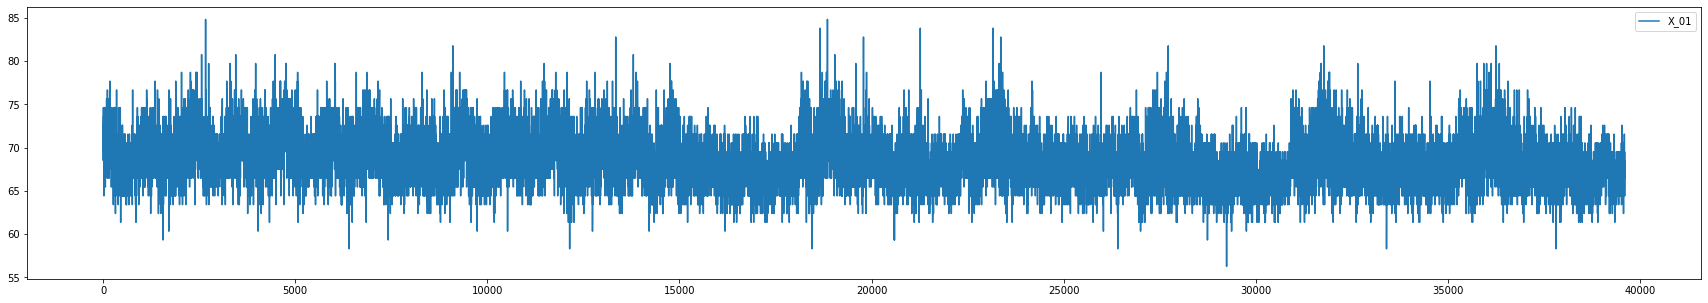

In [ ]:
#X_01 PCB 체결 시 단계별 누름량(Step 1)
plt.figure(figsize=(30,5))
plt.plot(train_x['X_01'], label='X_01') 
plt.legend()
plt.show()

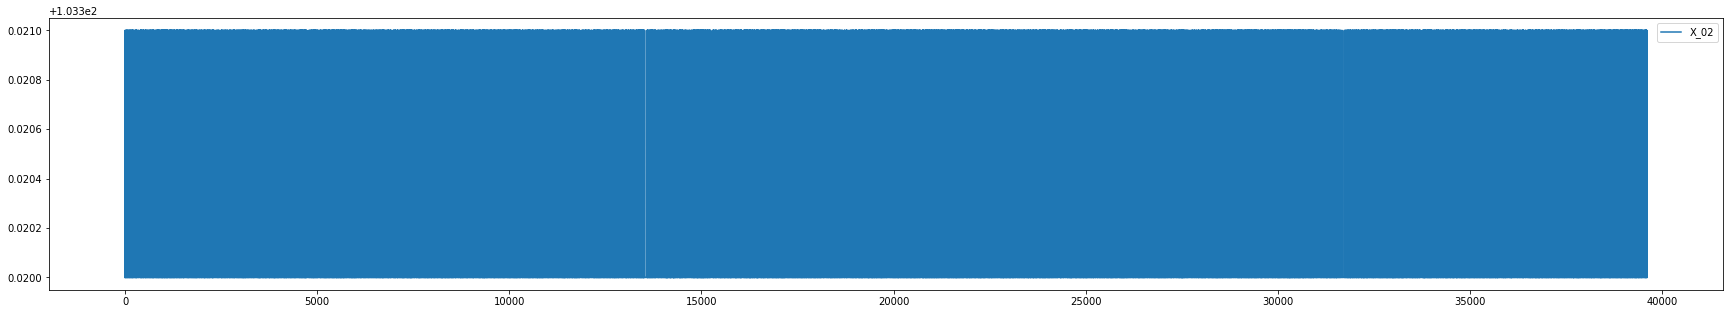

In [ ]:
#X_02 PCB 체결 시 단계별 누름량(Step 2) 
plt.figure(figsize=(30,5))
plt.plot(train_x['X_02'], label='X_02') 
plt.legend()
plt.show()

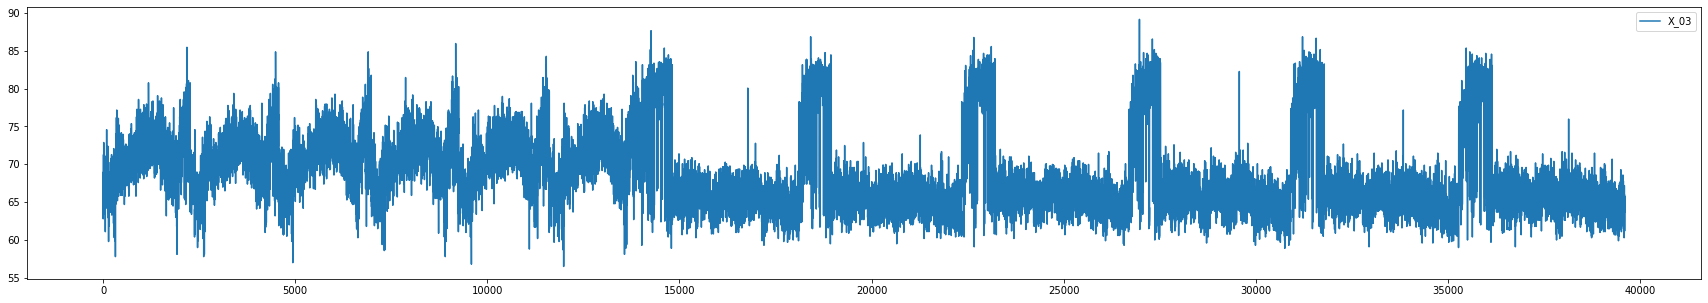

In [ ]:
#X_03 방열 재료 1 무게
plt.figure(figsize=(30,5))
plt.plot(train_x['X_03'], label='X_03') 
plt.legend()
plt.show()

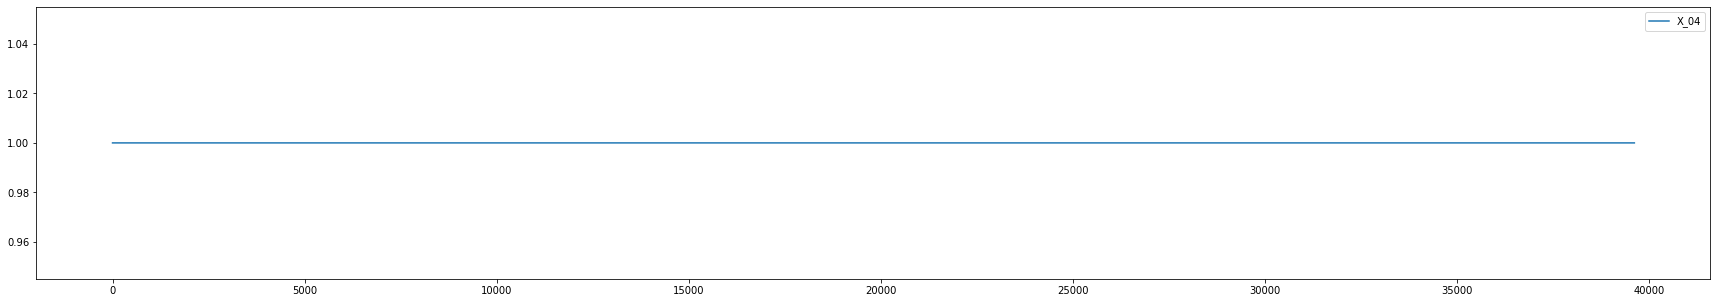

In [ ]:
#X_04 1차 검사 통과 여부
plt.figure(figsize=(30,5))
plt.plot(train_x['X_04'], label='X_04') 
plt.legend()
plt.show()

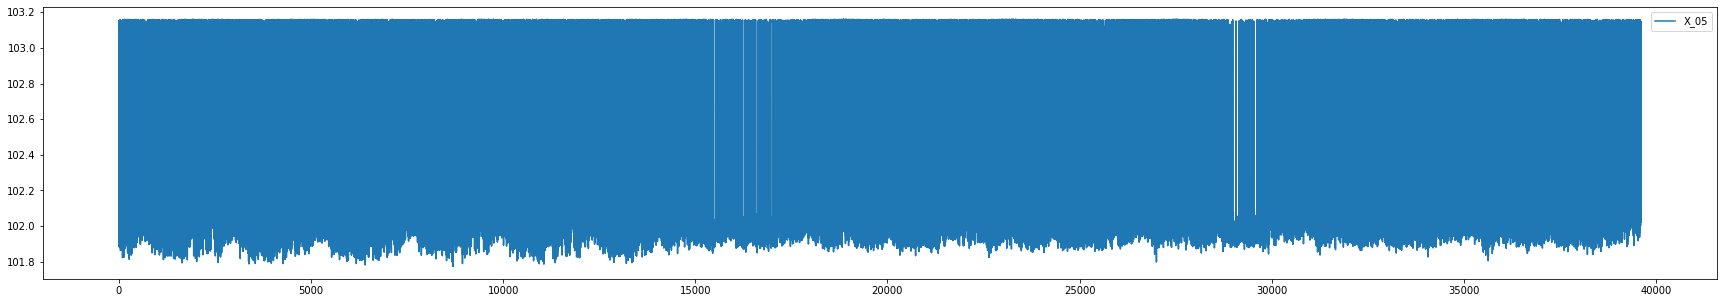

In [ ]:
#X_05 PCB 체결 시 단계별 누름량(Step 3)
plt.figure(figsize=(30,5))
plt.plot(train_x['X_05'], label='X_05') 
plt.legend()
plt.show()

In [ ]:
train_y.describe()

,Y_01,Y_02,Y_03,Y_04,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
count,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000
mean,1.353814,1.057267,1.014002,13.621191,31.290467,16.529382,3.155054,-26.294839,-26.308623,-22.400062,24.325061,-26.237762,-26.233869,-26.245868
std,0.356223,0.386266,0.361492,2.686632,2.543222,1.893014,0.418940,0.660537,0.653580,0.920952,0.830197,0.656329,0.655090,0.655989
min,0.017000,0.007000,0.017000,-0.331000,18.589000,-19.963000,0.502000,-29.652000,-29.523000,-31.119000,19.844000,-29.544000,-29.448000,-29.620000
25%,1.127500,0.793000,0.769000,11.822000,29.768000,16.146000,2.863000,-26.689000,-26.702000,-22.871000,23.836000,-26.630000,-26.624000,-26.640000
50%,1.349000,1.044000,0.998000,13.837000,31.710000,16.694000,3.126000,-26.254000,-26.266000,-22.275000,24.420000,-26.198000,-26.193000,-26.204000
75%,1.576000,1.300000,1.239000,15.626000,33.184000,17.164000,3.433500,-25.855000,-25.871000,-21.791000,24.911500,-25.799000,-25.794000,-25.809000
max,4.409000,3.998000,3.756000,98.794000,37.250000,18.998000,5.299000,-23.785000,-23.960000,-20.052000,26.703000,-23.722000,-23.899000,-23.856000


Regression Model Fit

In [ ]:
xgb = MultiOutputRegressor(xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma = 0, subsample=0.75, colsample_bytree = 1, max_depth=7) ).fit(train_x, train_y)
print('Done.')

[04:57:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:57:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:57:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:57:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:58:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:58:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:58:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:59:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

Inference

In [ ]:
test_x = pd.read_csv(DATA_PATH + 'test.csv').drop(columns=['ID'])

In [ ]:
preds = xgb.predict(test_x)
print('Done.')

Done.


Submit

In [ ]:
submit = pd.read_csv(DATA_PATH +'sample_submission.csv')

In [ ]:
for idx, col in enumerate(submit.columns):
    if col=='ID':
        continue
    submit[col] = preds[:,idx-1]
print('Done.')

Done.


In [ ]:
submit.to_csv(SUBMISSION_PATH + '11.csv', index=False)